In [ ]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

In [ ]:
!wget https://courses.openedu.ru/assets/courseware/v1/ca54904407995d200b1b9f5dd29031eb/asset-v1:ITMOUniversity+IMGPROCCOMPVIS+spring_2023_ITMO_mag+type@asset+block/peter-3794597_1280.jpg

--2023-05-26 16:25:24--  https://courses.openedu.ru/assets/courseware/v1/ca54904407995d200b1b9f5dd29031eb/asset-v1:ITMOUniversity+IMGPROCCOMPVIS+spring_2023_ITMO_mag+type@asset+block/peter-3794597_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 336465 (329K) [image/jpeg]
Saving to: ‘peter-3794597_1280.jpg’

peter-3794597_1280. 100%[===================>] 328.58K   804KB/s    in 0.4s    

2023-05-26 16:25:26 (804 KB/s) - ‘peter-3794597_1280.jpg’ saved [336465/336465]



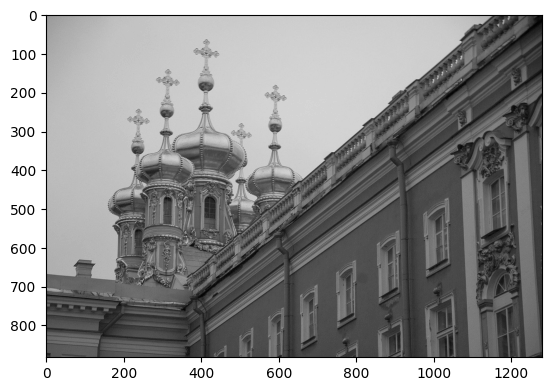

In [ ]:
img = cv2.imread('/content/saint-petersbourg-1936035_1280.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray');

In [ ]:
wavelet = 'haar'
c = pywt.dwt2(image,wavelet)
cA, (cH, cV, cD)= c

In [ ]:
titles = ['cA', 'cH', 'cV', 'cD']

In [ ]:
c_new = pywt.dwt2(cA,wavelet)

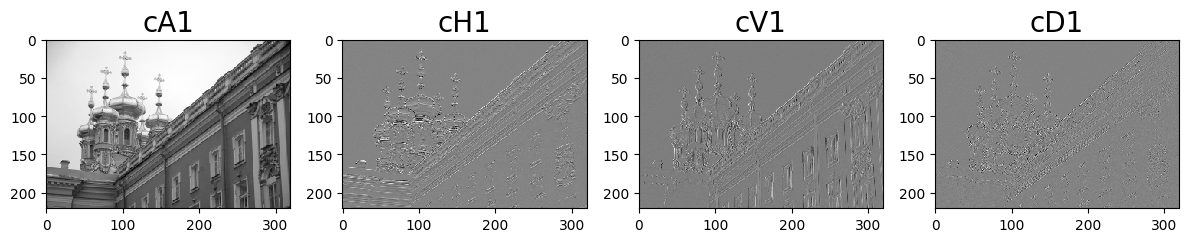

In [ ]:
cA1, (cH1, cV1, cD1) = c_new
titles = ['cA1', 'cH1', 'cV1', 'cD1']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA1, cH1, cV1, cD1]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

In [ ]:
# было
print('Количество нулей в наборе cA1 =',sum(sum(cA1[m] == 0) for m in range(len(cA1))))

Количество нулей в наборе cA1 = 0


In [ ]:
threshold = 110
h1 = cA1.shape[0]
for i in range(h1):
      c_new[0][i][np.abs(c_new[0][i])<threshold] = 0.0
#       for j in range(len(c_new[1])):
#          c_new[1][j][i][np.abs(c_new[1][j][i])<threshold] = 0.0
# print('Количество нулей =',(sum(sum(sum(c_new[1][m][n] == 0) for n in range(h1)) for m in range(len(c_new[1])))) + sum(sum(c_new[0][m] == 0) for m in range(h1)))


In [ ]:
# стало
print('Количество нулей в наборе cA1 =',sum(sum(cA1[m] == 0) for m in range(len(cA1))))

Количество нулей в наборе cA1 = 772


In [ ]:
cv2.imwrite('cA1.jpg', cA1)

True

In [ ]:
!wget https://courses.openedu.ru/assets/courseware/v1/b2f1a77b3be994ba111f7e27923a06f2/asset-v1:ITMOUniversity+AUTXTIMGPROC+spring_2023_ITMO_mag+type@asset+block/c1_265_saint-petersbourg-1936035_1280.jpg

--2023-05-29 08:41:01--  https://courses.openedu.ru/assets/courseware/v1/b2f1a77b3be994ba111f7e27923a06f2/asset-v1:ITMOUniversity+AUTXTIMGPROC+spring_2023_ITMO_mag+type@asset+block/c1_265_saint-petersbourg-1936035_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25712 (25K) [image/jpeg]
Saving to: ‘c1_265_saint-petersbourg-1936035_1280.jpg’

c1_265_saint-peters 100%[===================>]  25.11K  --.-KB/s    in 0s      

2023-05-29 08:41:02 (147 MB/s) - ‘c1_265_saint-petersbourg-1936035_1280.jpg’ saved [25712/25712]



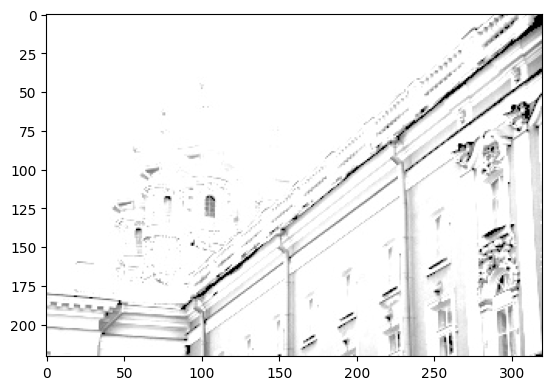

In [ ]:
cA1 = cv2.imread('/content/cA1.jpg')
cA1 = cv2.cvtColor(cA1, cv2.COLOR_BGR2GRAY)
plt.imshow(cA1,cmap='gray');

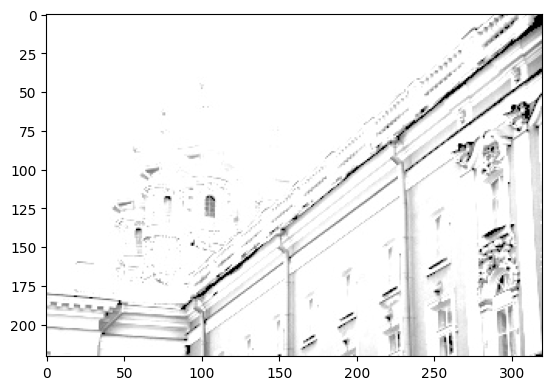

In [ ]:
img_3794597 = cv2.imread('/content/c1_265_saint-petersbourg-1936035_1280.jpg')
image_3794597 = cv2.cvtColor(img_3794597, cv2.COLOR_BGR2GRAY)
plt.imshow(image_3794597,cmap='gray');

In [ ]:
(cA1 - image_3794597).sum()

0

In [ ]:
!wget https://courses.openedu.ru/assets/courseware/v1/956dd84cb6aedb33323c35b89da2966f/asset-v1:ITMOUniversity+IMGPROCCOMPVIS+spring_2023_ITMO_mag+type@asset+block/c1_496_peter-3794597_1280.jpg

--2023-05-26 16:26:00--  https://courses.openedu.ru/assets/courseware/v1/956dd84cb6aedb33323c35b89da2966f/asset-v1:ITMOUniversity+IMGPROCCOMPVIS+spring_2023_ITMO_mag+type@asset+block/c1_496_peter-3794597_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19549 (19K) [image/jpeg]
Saving to: ‘c1_496_peter-3794597_1280.jpg’

c1_496_peter-379459 100%[===================>]  19.09K  --.-KB/s    in 0s      

2023-05-26 16:26:01 (321 MB/s) - ‘c1_496_peter-3794597_1280.jpg’ saved [19549/19549]



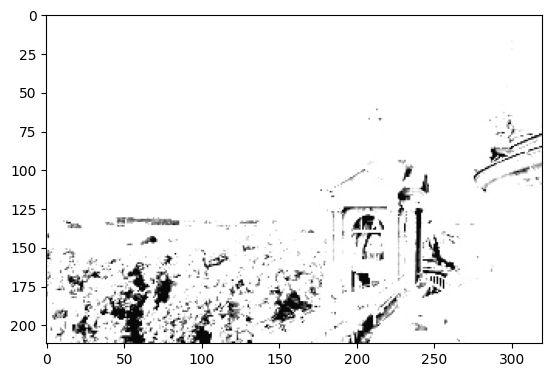

In [ ]:
img_496 = cv2.imread('/content/c1_496_peter-3794597_1280.jpg')
image_496 = cv2.cvtColor(img_496, cv2.COLOR_BGR2GRAY)
plt.imshow(image_496,cmap='gray');

In [ ]:
cA1 - image_496

array([[  0,   0,   0, ...,   0, 253, 239],
       [  0,   0,   0, ...,   0, 251, 242],
       [  0,   0,   0, ..., 255, 250, 247],
       ...,
       [  1, 255, 255, ...,   0,   0,   0],
       [  0, 254,   0, ...,   0,   0,   0],
       [252,   3, 204, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
(cA1 - image_496).sum()

3229618

In [ ]:
!wget https://courses.openedu.ru/assets/courseware/v1/78bf36b7e2a58c2dc1fa6700d7bc17b4/asset-v1:ITMOUniversity+IMGPROCCOMPVIS+spring_2023_ITMO_mag+type@asset+block/c1_644_peter-3794597_1280.jpg

--2023-05-26 16:26:04--  https://courses.openedu.ru/assets/courseware/v1/78bf36b7e2a58c2dc1fa6700d7bc17b4/asset-v1:ITMOUniversity+IMGPROCCOMPVIS+spring_2023_ITMO_mag+type@asset+block/c1_644_peter-3794597_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23112 (23K) [image/jpeg]
Saving to: ‘c1_644_peter-3794597_1280.jpg’

c1_644_peter-379459 100%[===================>]  22.57K  --.-KB/s    in 0s      

2023-05-26 16:26:05 (313 MB/s) - ‘c1_644_peter-3794597_1280.jpg’ saved [23112/23112]



In [ ]:
img_644 = cv2.imread('/content/c1_644_peter-3794597_1280.jpg')
image_644 = cv2.cvtColor(img_644, cv2.COLOR_BGR2GRAY)
cA1 - image_644

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
(cA1 - image_644).sum()

1316547

In [ ]:
!wget https://courses.openedu.ru/assets/courseware/v1/2375227a45059e6af590deb9c4cbadab/asset-v1:ITMOUniversity+IMGPROCCOMPVIS+spring_2023_ITMO_mag+type@asset+block/c1_812_peter-3794597_1280.jpg

--2023-05-26 16:26:06--  https://courses.openedu.ru/assets/courseware/v1/2375227a45059e6af590deb9c4cbadab/asset-v1:ITMOUniversity+IMGPROCCOMPVIS+spring_2023_ITMO_mag+type@asset+block/c1_812_peter-3794597_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23334 (23K) [image/jpeg]
Saving to: ‘c1_812_peter-3794597_1280.jpg’

c1_812_peter-379459 100%[===================>]  22.79K  --.-KB/s    in 0s      

2023-05-26 16:26:07 (414 MB/s) - ‘c1_812_peter-3794597_1280.jpg’ saved [23334/23334]



In [ ]:
img_812 = cv2.imread('/content/c1_812_peter-3794597_1280.jpg')
image_812 = cv2.cvtColor(img_812, cv2.COLOR_BGR2GRAY)
cA1 - image_812

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
(cA1 - image_812).sum()

0

In [ ]:
(image_3794597 - image_812).sum()

0

In [ ]:
!wget https://courses.openedu.ru/assets/courseware/v1/2c7256ddc1c54083158b12a779e10424/asset-v1:ITMOUniversity+IMGPROCCOMPVIS+spring_2023_ITMO_mag+type@asset+block/c1_853_peter-3794597_1280.jpg

--2023-05-26 16:26:09--  https://courses.openedu.ru/assets/courseware/v1/2c7256ddc1c54083158b12a779e10424/asset-v1:ITMOUniversity+IMGPROCCOMPVIS+spring_2023_ITMO_mag+type@asset+block/c1_853_peter-3794597_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26425 (26K) [image/jpeg]
Saving to: ‘c1_853_peter-3794597_1280.jpg’

c1_853_peter-379459 100%[===================>]  25.81K  --.-KB/s    in 0s      

2023-05-26 16:26:09 (386 MB/s) - ‘c1_853_peter-3794597_1280.jpg’ saved [26425/26425]



In [ ]:
img_853 = cv2.imread('/content/c1_853_peter-3794597_1280.jpg')
image_853 = cv2.cvtColor(img_853, cv2.COLOR_BGR2GRAY)
cA1 - image_853

array([[  0,   0,   0, ...,  33, 253,  51],
       [  0,   0,   0, ...,   0,  12,  53],
       [  0,   0,   0, ...,   2,  55,  47],
       ...,
       [  1, 254,  10, ...,   0,   0,   0],
       [  0, 254,   0, ...,   0,   0,   0],
       [252,   2,  45, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
(cA1 - image_853).sum()

1752511